In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_train = pd.read_csv('datasets/train.csv')
y = pd.read_csv('datasets/test.csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Dicionário dos campos


- PassangerId = id do passageiro que embarcou
- Survided = identificação se aquele passageiro sobreviveu ou não o desastre
- pclass = a classe que o passageiro pertence
- sex = genero do passageiro
- age = idade do passageiro 
- sibSp = ainda estou um pouco confuso sobre isso
- parch = aqui também
- ticket = identificacao da passagem do passageiro
- fare = o quanto ele pagou pela passagem
- cabin = idendificacao da cabine do passageiro
- embarked = onde o passageiro embarcou

In [6]:
#identificando os valores nulos do dataset

df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

array([[<AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>],
       [<AxesSubplot:title={'center':'Parch'}>,
        <AxesSubplot:title={'center':'Fare'}>]], dtype=object)

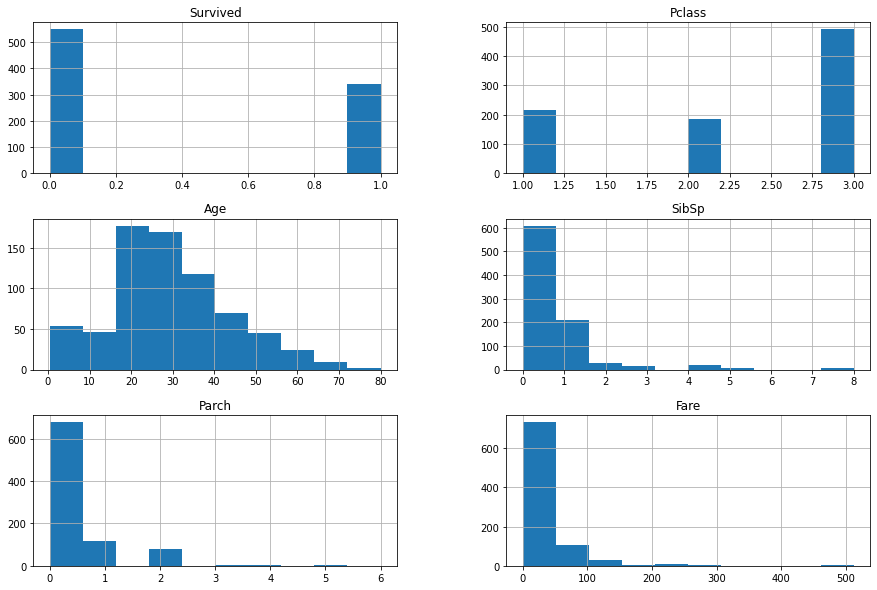

In [20]:
df_train.drop(columns = ['PassengerId']).hist(figsize=(15, 10))

In [9]:
# verificando se existe alguma correlação linear com a nossa variável alvo
df_train.corr()['Survived'].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

Já podemos identificar uma forte correlação positiva entre o Fare (preço da passagem) com a nossa variável alvo. Ou seja, quanto mais caro é a passagem, maior é a concentração de pessoas que sobreviveram. Assim como podemos encontrar uma forte correlação negativa com o Pclass (classe que o passageiro pertence). Lembrando que a classe vai de 1 até 3, sendo o 1º classe a mais cara.</br>

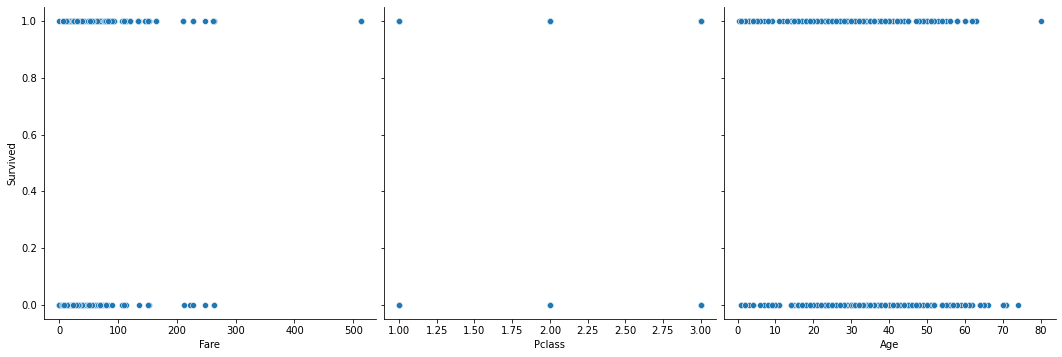

In [27]:
sns.pairplot(
    data = df_train,
    y_vars = 'Survived',
    x_vars = 'Fare,Pclass,Age'.split(','),
    height = 5
)

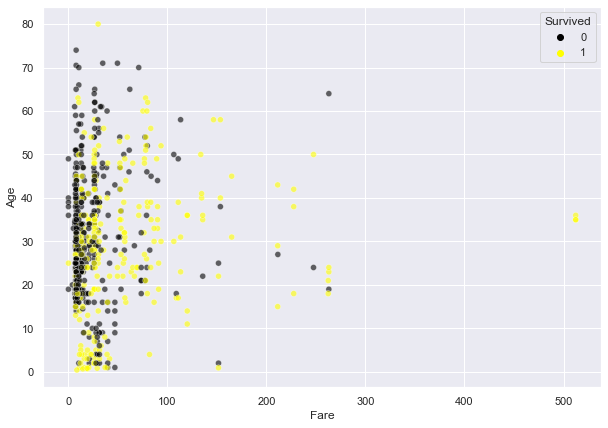

In [57]:
sns.set(style = 'darkgrid', palette = 'Spectral')

ax = sns.scatterplot(data = df_train, y = 'Age', x = 'Fare', hue='Survived', alpha=0.6, palette = ['black', 'yellow'])
ax.figure.set_size_inches(10, 7)